## Step 1: Load Articles into a DataFrame

In this step, we will load all published articles associated with our Dev.to account into a Pandas DataFrame. This data will allow us to examine the article titles and publication dates.

The `load_articles_to_dataframe` function fetches articles from the Dev.to API, handles pagination, and organizes the results in a DataFrame for easy analysis.


In [38]:
import os
import src.api_client as api_client
import pandas as pd

# Check if the articles file exists
if os.path.exists("articles.parquet"):
    # Load articles from the existing Parquet file
    articles_df = pd.read_parquet("articles.parquet")
    print("Loaded articles from articles.parquet")
else:
    # Fetch articles and save to Parquet file
    articles_df = api_client.load_articles_to_dataframe()
    articles_df.to_parquet("articles.parquet", compression='gzip')
    print("Fetched articles from API and saved to articles.parquet")

articles_df.head(10)

Loaded articles from articles.parquet


,title,created_at,public_reactions_count
0,12 Steps to Organize and Maintain Your Python ...,2024-10-30T16:16:25.202Z,6
1,Data Analytics Dashboard Starter Kit with Neon...,2024-08-31T11:22:21.164Z,23
2,Binary Tree,2024-06-16T10:24:55.823Z,9
3,My Journey Learning AI for Songwriting: LSTMs ...,2024-02-19T13:47:52.939Z,17
4,The Data Engineering Docker-Compose Starter Kit,2023-09-22T09:38:28.956Z,13
5,The Golang Saga: A Coder’s Journey There and B...,2023-08-16T17:06:20.082Z,7
6,The Golang Saga: A Coder’s Journey There and B...,2023-07-27T16:19:13.884Z,7
7,The Golang Saga: A Coder’s Journey There and B...,2023-07-04T19:27:11.200Z,22
8,Unleash Your Pipeline Creativity: Local Develo...,2023-05-03T07:52:12.468Z,5
9,From Kafka to Amazon S3: Partitioning Outputs,2023-04-09T16:03:41.325Z,7


## Step 2: Load Followers into a DataFrame

Next, we’ll load the details of all followers into a Pandas DataFrame. This data provides insights into each follower’s profile, which we can later analyze to assess follower engagement and activity levels.

The `load_followers_to_dataframe` function collects data on each follower, including profile information.


In [39]:
# Check if the followers file exists
if os.path.exists("followers.parquet"):
    # Load followers from the existing Parquet file
    followers_df = pd.read_parquet("followers.parquet")
    print("Loaded followers from followers.parquet")
else:
    # Fetch followers and save to Parquet file
    followers_df = api_client.load_extended_followers_to_dataframe()
    followers_df.to_parquet("followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to followers.parquet")

followers_df.head(10)

Loaded followers from followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,summary,location,website_url,joined_at
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,Development,None,None,"Oct 31, 2024"
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Aug 31, 2024"


In [40]:
print(f"You have {len(articles_df)} articles and {len(followers_df)} followers.")

You have 11 articles and 2485 followers.


## Step 3: Enrich Followers Data with Article Information

In this step, we expand our analysis by adding article information for each follower. Using the `update_followers_with_articles` function, we retrieve:

- The total number of articles each follower has published (`article_count`).
- A list of article titles for each follower (`article_titles`).
- A unique list of tags across all articles by each follower (`unique_tags`).

This enriched data will allow us to better understand follower engagement and interests based on their content.

In [41]:
if os.path.exists("extended_followers.parquet"):
    # Load followers from the existing Parquet file
    extended_followers_df = pd.read_parquet("extended_followers.parquet")
    print("Loaded followers from extended_followers.parquet")
else:
    # Enrich followers with article information
    extended_followers_df = api_client.update_followers_with_articles(followers_df)
    extended_followers_df.to_parquet("extended_followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to extended_followers.parquet")

extended_followers_df.head(10)

Loaded followers from extended_followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,summary,location,website_url,joined_at,article_count,article_titles,unique_tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,Development,None,None,"Oct 31, 2024",0,[],[],[],[],[]
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Aug 31, 2024",0,[],[],[],[],[]


In [42]:
extended_followers_df[extended_followers_df['article_count']>0]

,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,summary,location,website_url,joined_at,article_count,article_titles,unique_tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts
46,user_follower,58202818,2024-10-31T07:44:06Z,2313000,Mareyia,/mareyiaz,mareyiaz,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",1,[Card Fight: A Python Terminal Game],"[gamedev, python, webdev]",[1],[0],[0]
201,user_follower,58161903,2024-10-30T19:18:12Z,2309694,Jørn Andre,/john828,john828,"https://media2.dev.to/dynamic/image/width=320,...",None,None,"Founder of https://tbtm.sale, creating innovat...","Bergen, Norway",https://tbtm.sale,"Oct 30, 2024",1,[Building a Bible Publication Engine],"[linux, python, mysql]",[2],[0],[1]
204,user_follower,58161484,2024-10-30T19:11:26Z,2309628,Sargon The Akkadian,/sargonthegreat,sargonthegreat,"https://media2.dev.to/dynamic/image/width=320,...",None,None,I am an artist and erstwhile programmer starti...,"Chicago, IL",,"Oct 30, 2024",1,[First Post HackingWithSwift],[swift],[1],[0],[0]
228,user_follower,58152586,2024-10-30T17:32:42Z,2309151,Jessica Robin,/jessica_robin_6897a111009,jessica_robin_6897a111009,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 30, 2024",1,[Bubble Tea Cafe in Seattle: Flavorful Teas & ...,"[news, data]",[4],[0],[0]
317,user_follower,50773250,2024-08-31T18:17:05Z,2008588,Kodade Ilhame,/k_ilhame,k_ilhame,"https://media2.dev.to/dynamic/image/width=320,...",None,None,Software Engineer | Full-Stack Developer | AI ...,"Casablanca, Morocco",https://buymeacoffee.com/ilhamekodade,"Aug 31, 2024",1,[Your 2024 Roadmap to Becoming a Machine Learn...,"[programming, ai, machinelearning]",[3],[12],[6]
384,user_follower,40174692,2024-06-16T23:06:58Z,1636283,Cebo Msweli,/cebo_msweli,cebo_msweli,"https://media2.dev.to/dynamic/image/width=320,...",None,None,Computer Science And IT Student At UKZN,None,None,"Jun 16, 2024",1,[LINKED LIST DATA STRUCTURE IN COMPUTER SCIENCE.],"[beginners, computerscience, cschallenge, devc...",[1],[0],[0]
493,user_follower,40120093,2024-06-16T13:00:25Z,1606366,Matheus Gois,/maatheusgois,maatheusgois,"https://media2.dev.to/dynamic/image/width=320,...",None,MaatheusGois,None,None,None,"Jun 10, 2024",7,[3 Rs of Software Architecture for iOS based i...,"[solidprinciples, ios, liveactions, math, spri...","[15, 1, 2, 2, 1, 1, 2]","[1, 1, 0, 2, 0, 1, 1]","[19, 12, 10, 6, 5, 12, 7]"
529,user_follower,34860391,2024-04-21T07:40:18Z,1297507,silenzzz,/silenzzz,silenzzz,"https://media2.dev.to/dynamic/image/width=320,...",None,silenzzz,Java developer,,,"Feb 23, 2024",2,"[Telegram bot with Camel & Spring boot, Java l...","[apachecamel, library, java, torrent, telegram...","[1, 1]","[0, 0]","[4, 1]"
542,user_follower,31212594,2024-02-29T19:10:38Z,1315362,Coding Werkstatt,/codingwerkstatt,codingwerkstatt,"https://media2.dev.to/dynamic/image/width=320,...",None,codingwerkstatt,"👩‍💻 Über mich:\nIch liebe es, komplexe Problem...","Stuttgart, Germany",,"Feb 29, 2024",5,[⚠️Problems are just opportunities for solutio...,"[studium, beginners, ausbildungsbetrieb, karri...","[1, 2, 2, 1, 1]","[2, 0, 0, 0, 0]","[1, 0, 0, 0, 0]"
619,user_follower,31129046,2024-02-29T02:07:05Z,1312837,Md. Rahim Uddin,/thereinforce43,thereinforce43,"https://media2.dev.to/dynamic/image/width=320,...",None,TheReinforce43,Django Backend Developer || Power BI Specialist,None,None,"Feb 29, 2024",1,[I want to Make a Multi-Role on Django Rest Fr...,[],[0],[0],[0]


## Step 4: Enrich Followers Data with Profile Data from Dev.to

In this step, we enhance our follower dataset by including additional profile data scraped from Dev.to:

- **Badges**: List of badges each follower has earned.
- **Comments Count**: Total number of comments written by each follower.
- **Tags Followed**: Number of tags each follower is following.

In [43]:
if os.path.exists("extended_scrapped_followers.parquet"):
    extended_scrapped_followers_df = pd.read_parquet("extended_scrapped_followers.parquet")
    print("Loaded followers from extended_followers.parquet")
else:
    extended_scrapped_followers_df = api_client.update_followers_with_stats(extended_followers_df)
    extended_scrapped_followers_df.to_parquet("extended_scrapped_followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to extended_followers.parquet")

extended_scrapped_followers_df.head(10)

Loaded followers from extended_followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,...,article_count,article_titles,unique_tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts,badges,badge_descriptions,comments_count,tags_count
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,...,0,[],[],[],[],[],[],[],0,0
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,2
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,3
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,2
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,2


In [44]:
extended_scrapped_followers_df.columns

Index(['type_of', 'id', 'created_at', 'user_id', 'name', 'path', 'username',
       'profile_image', 'twitter_username', 'github_username', 'summary',
       'location', 'website_url', 'joined_at', 'article_count',
       'article_titles', 'unique_tags', 'article_reading_time_minutes',
       'article_comments_counts', 'article_positive_reactions_counts',
       'badges', 'badge_descriptions', 'comments_count', 'tags_count'],
      dtype='object')

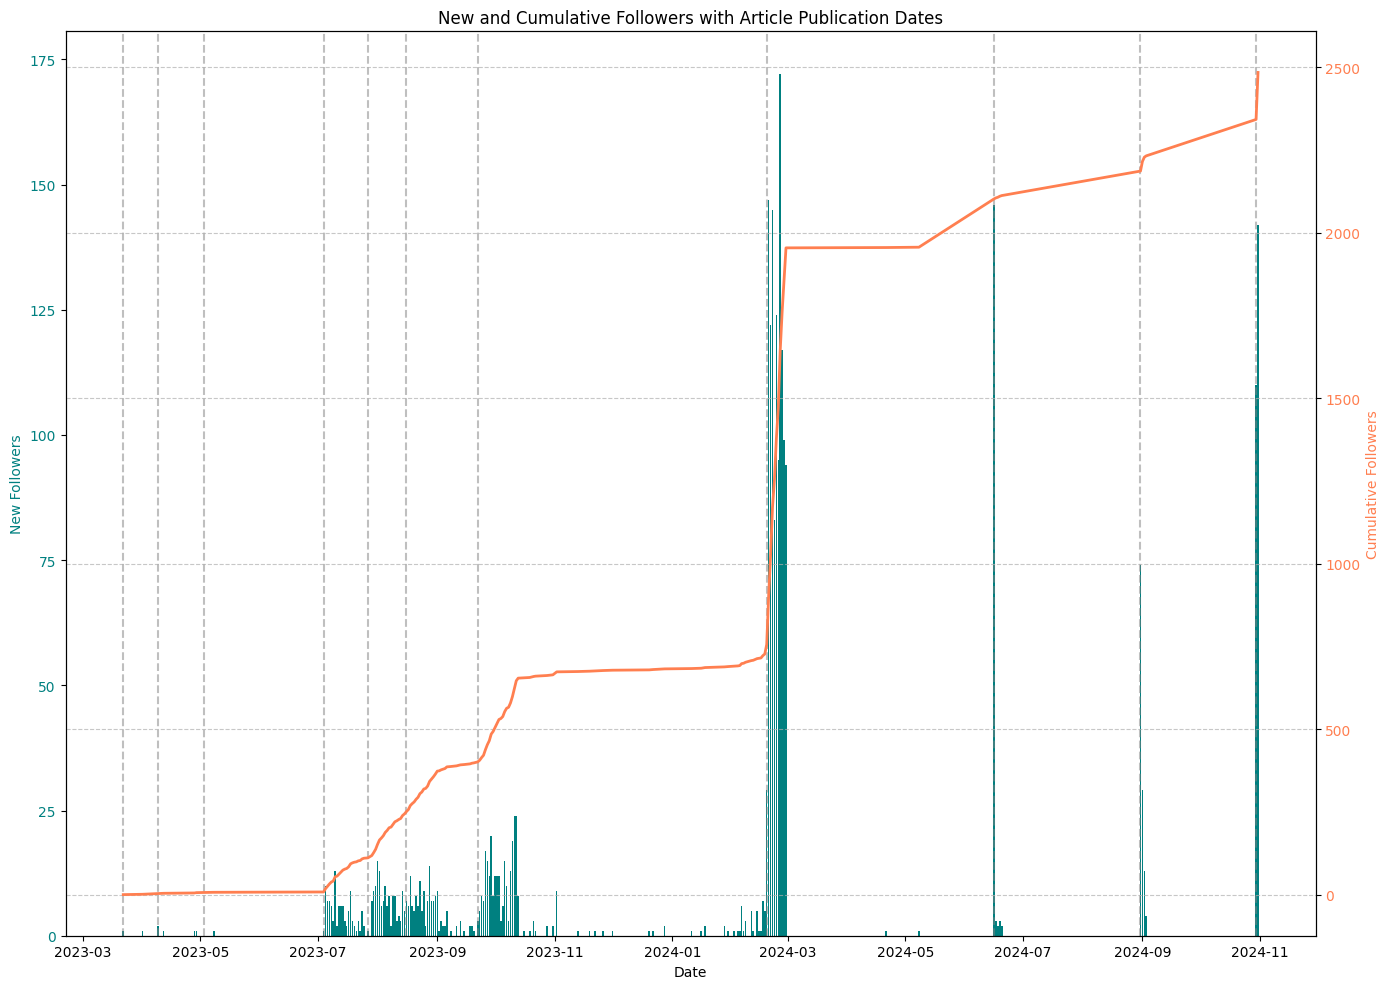

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

articles_df_copy = articles_df.copy()
followers_df_copy = extended_scrapped_followers_df.copy()

# Ensure 'created_at' is in datetime format in the copies
articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at']).dt.date
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at']).dt.date

# Calculate the daily follower count and cumulative sum for total followers over time
daily_follower_count = followers_df_copy['created_at'].value_counts().sort_index()
cumulative_followers = daily_follower_count.cumsum()

# Prepare the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 10))

# Plot daily new follower count as bars on the left y-axis
ax1.bar(daily_follower_count.index, daily_follower_count.values, color='teal', label='New Followers')
ax1.set_xlabel("Date")
ax1.set_ylabel("New Followers", color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Set up the right y-axis for cumulative followers
ax2 = ax1.twinx()
ax2.plot(cumulative_followers.index, cumulative_followers.values, color='#FF7F50', linewidth=2, label='Cumulative Followers')
ax2.set_ylabel("Cumulative Followers", color='#FF7F50')
ax2.tick_params(axis='y', labelcolor='#FF7F50')

# Add vertical lines for article publication dates
for article_date in articles_df_copy['created_at']:
    ax1.axvline(x=article_date, color='gray', linestyle='--', alpha=0.5)

# Title and grid
plt.title("New and Cumulative Followers with Article Publication Dates")
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [46]:
import pandas as pd
import plotly.graph_objects as go

# Make copies with new variable names to avoid modifying the original DataFrames
articles_df_copy = articles_df.copy()
followers_df_copy = extended_scrapped_followers_df.copy()

# Ensure 'created_at' is in datetime format in the copies
articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at']).dt.date
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at']).dt.date

# Calculate the daily follower count and cumulative sum for total followers over time
daily_follower_count = followers_df_copy['created_at'].value_counts().sort_index()
cumulative_followers = daily_follower_count.cumsum()

# Create the plot
fig = go.Figure()

# Add bars for new followers with the left y-axis
fig.add_trace(go.Bar(
    x=daily_follower_count.index,
    y=daily_follower_count.values,
    name='New Followers',
    marker_color='teal',
    marker_line_color='teal',  # Same color for bar borders
    marker_line_width=1,     # Increased border width for bars
    hovertemplate='Date: %{x}<br>New Followers: %{y}<extra></extra>'
))

# Add a line for cumulative followers with the right y-axis
fig.add_trace(go.Scatter(
    x=cumulative_followers.index,
    y=cumulative_followers.values,
    mode='lines',
    name='Cumulative Followers',
    line=dict(color='#FF7F50', width=3),  # Coral color for cumulative line
    yaxis="y2",
    hovertemplate='Date: %{x}<br>Cumulative Followers: %{y}<extra></extra>'
))

# Add vertical lines for each article date with hover text for article titles
for _, row in articles_df_copy.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['created_at'], row['created_at']],
        y=[0, cumulative_followers.max()],
        mode='lines',
        line=dict(color='gray', dash='dash'),
        hoverinfo='text',
        text=f"Article Date: {row['created_at']}<br>Title: {row['title']}",
        showlegend=False
    ))

# Update layout with customized dimensions, y-axis ranges, and white background
fig.update_layout(
    title="New and Cumulative Followers with Article Publication Dates",
    xaxis_title="Date",
    yaxis=dict(title="New Followers", side='left', range=[0, daily_follower_count.max() * 1.2]),
    yaxis2=dict(title="Cumulative Followers", overlaying='y', side='right', range=[0, cumulative_followers.max() * 1.1]),
    width=1000,   # Increased width for better viewing
    height=800,   # Reduced height
    legend=dict(x=0.01, y=0.99),
    hovermode="x unified",
    bargap=0.2,  # Reduce gap between bars for better density
    plot_bgcolor='white'  # Set background to white
)

# Update grid line colors for better contrast on white background
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

# Show the plot
fig.show()


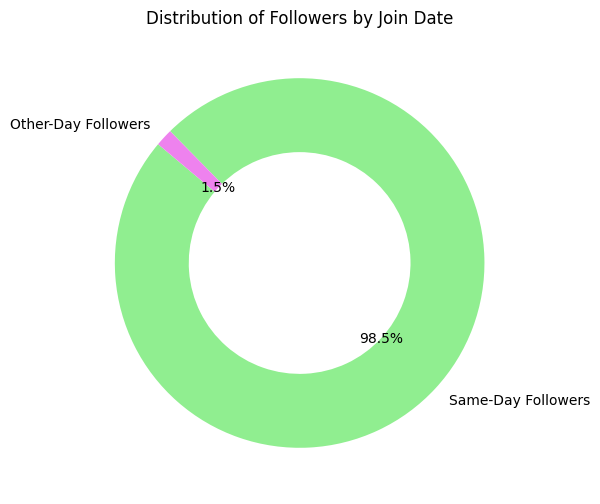

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

articles_df_copy = articles_df.copy()
followers_df_copy = extended_scrapped_followers_df.copy()
# Ensure 'created_at' and 'joined_at' are in datetime format
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at']).dt.date
followers_df_copy['joined_at'] = pd.to_datetime(followers_df_copy['joined_at']).dt.date

# Calculate counts for each category
total_followers = followers_df_copy.shape[0]
same_day_joiners = followers_df_copy[followers_df_copy['created_at'] == followers_df_copy['joined_at']].shape[0]
other_day_joiners = total_followers - same_day_joiners

# Data for the pie chart
labels = ["Same-Day Followers", "Other-Day Followers"]
sizes = [same_day_joiners, other_day_joiners]
colors = ["lightgreen", "violet"]

# Create the donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))

# Add title
plt.title("Distribution of Followers by Join Date")

# Show the plot
plt.show()


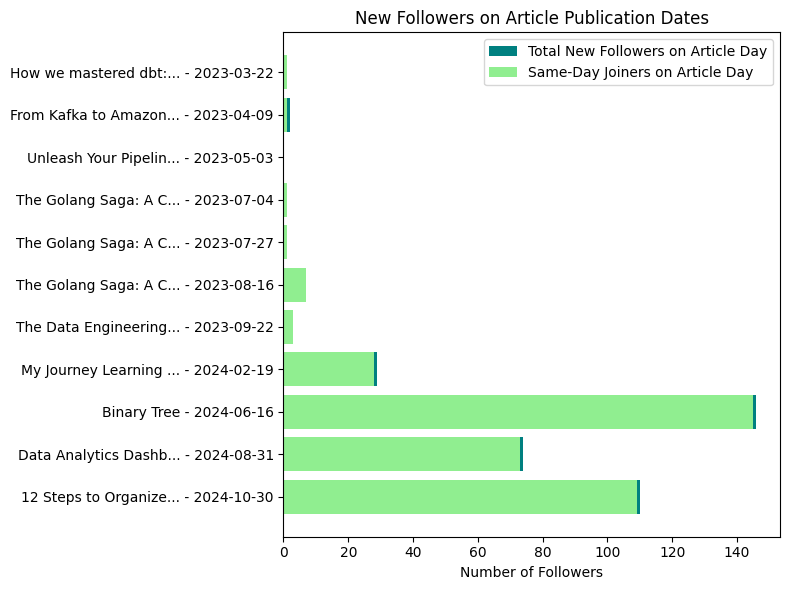

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

articles_df_copy = articles_df.copy()
followers_df_copy = extended_scrapped_followers_df.copy()
# Ensure 'created_at' and 'joined_at' are in datetime format
articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at']).dt.date
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at']).dt.date
followers_df_copy['joined_at'] = pd.to_datetime(followers_df_copy['joined_at']).dt.date

# Shorten titles function
def shorten_title(title, max_length=20):
    return title if len(title) <= max_length else title[:max_length] + "..."

# Prepare data for the bar chart
article_dates = articles_df_copy['created_at'].unique()
total_followers_per_article = []
same_day_joiners_per_article = []
article_labels = [
    f"{shorten_title(title)} - {date}" 
    for title, date in zip(articles_df_copy['title'], articles_df_copy['created_at'])
]

for date in article_dates:
    # Total followers on the article creation date
    total_followers = followers_df_copy[followers_df_copy['created_at'] == date].shape[0]
    total_followers_per_article.append(total_followers)
    
    # Followers who joined on the same day as the article creation date
    same_day_joiners = followers_df_copy[
        (followers_df_copy['created_at'] == date) &
        (followers_df_copy['created_at'] == followers_df_copy['joined_at'])
    ].shape[0]
    same_day_joiners_per_article.append(same_day_joiners)

# Convert lists to numpy arrays for easier manipulation
total_followers_per_article = np.array(total_followers_per_article)
same_day_joiners_per_article = np.array(same_day_joiners_per_article)
y_positions = np.arange(len(article_labels))

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot total followers bars
ax.barh(y_positions, total_followers_per_article, color='teal', label='Total New Followers on Article Day')

# Plot same-day joiners as overlay bars
ax.barh(y_positions, same_day_joiners_per_article, color='lightgreen', label='Same-Day Joiners on Article Day')

# Set y-axis labels and title
ax.set_yticks(y_positions)
ax.set_yticklabels(article_labels)
ax.set_xlabel("Number of Followers")
ax.set_title("New Followers on Article Publication Dates")
ax.legend()

plt.tight_layout()
plt.show()

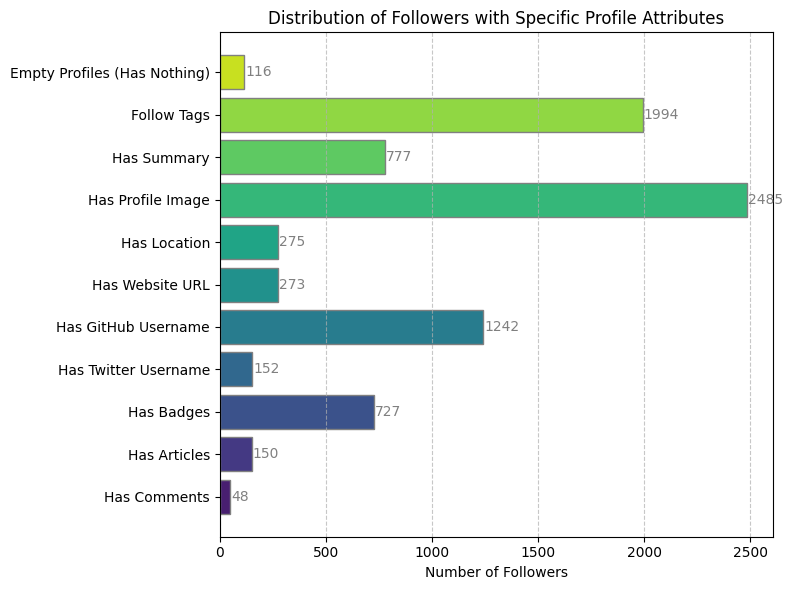

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create copies to avoid modifying the original DataFrames
articles_df_copy = articles_df.copy()
followers_df_copy = extended_scrapped_followers_df.copy()

# Ensure 'created_at' and 'joined_at' columns are in datetime format
articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at'], errors='coerce')
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at'], errors='coerce')
followers_df_copy['joined_at'] = pd.to_datetime(followers_df_copy['joined_at'], errors='coerce')

# Extract date-only values for the 'created_date' and 'joined_date' columns
articles_df_copy['created_date'] = articles_df_copy['created_at'].dt.date
followers_df_copy['joined_date'] = followers_df_copy['joined_at'].dt.date

# Get the list of publication dates
article_dates = articles_df_copy['created_date'].unique()

# Calculate counts for each attribute
attribute_counts = {
    "Has Comments": followers_df_copy['comments_count'].gt(0).sum(),
    "Has Articles": followers_df_copy['article_count'].gt(0).sum(),
    "Has Badges": followers_df_copy['badges'].str.len().gt(0).sum(),
    "Has Twitter Username": followers_df_copy['twitter_username'].notna().sum(),
    "Has GitHub Username": followers_df_copy['github_username'].notna().sum(),
    "Has Website URL": followers_df_copy['website_url'].notna().sum(),
    "Has Location": followers_df_copy['location'].notna().sum(),
    "Has Profile Image": followers_df_copy['profile_image'].notna().sum(),
    "Has Summary": followers_df_copy['summary'].notna().sum(),
    "Follow Tags": followers_df_copy['tags_count'].gt(0).sum(),
    "Empty Profiles (Has Nothing)": followers_df_copy[
        ((followers_df_copy['joined_date'].isin(article_dates)) | 
         (~followers_df_copy['joined_date'].isin(article_dates))) &
        (followers_df_copy['comments_count'] == 0) &
        (followers_df_copy['article_count'] == 0) &
        (followers_df_copy['tags_count'] == 0) &
        (followers_df_copy['badges'].str.len() == 0) &
        (followers_df_copy[['twitter_username', 'github_username', 
                            'location', 'website_url', 'summary']]
         .isnull().all(axis=1))
    ].shape[0]
}

# Prepare data for plotting
labels = list(attribute_counts.keys())
values = list(attribute_counts.values())

# Choose a color palette from Seaborn
palette = sns.color_palette("viridis", len(labels))

# Plot
plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

# Add titles and labels
plt.xlabel("Number of Followers")
plt.title("Distribution of Followers with Specific Profile Attributes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


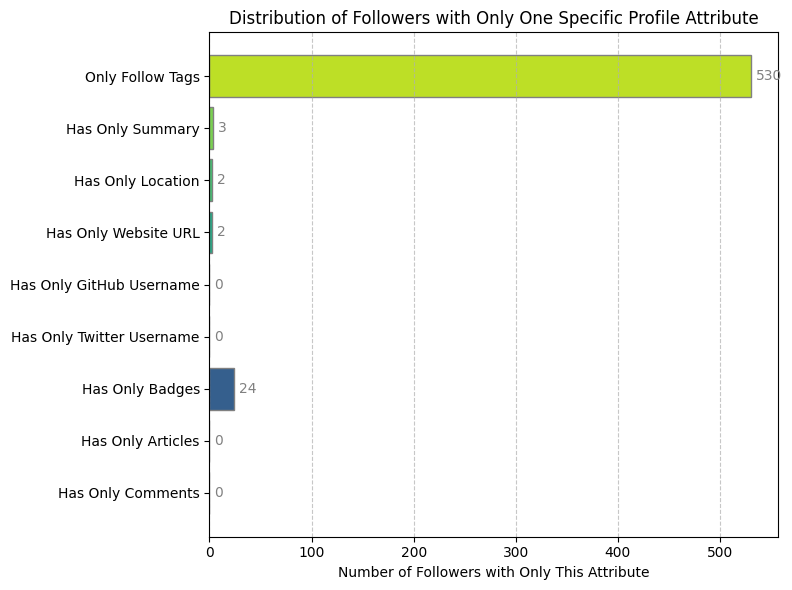

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

articles_df_copy = articles_df.copy()
followers_df_copy = extended_scrapped_followers_df.copy()

articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at'], errors='coerce')
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at'], errors='coerce')

# Extract date-only values for the 'created_date' and 'joined_date' columns
articles_df_copy['created_date'] = articles_df_copy['created_at'].dt.date
followers_df_copy['created_at'] = followers_df_copy['created_at'].dt.date

# Define the attributes to analyze
attributes = {
    "Has Only Comments": 'comments_count',
    "Has Only Articles": 'article_count',
    "Has Only Badges": 'badges',
    "Has Only Twitter Username": 'twitter_username',
    "Has Only GitHub Username": 'github_username',
    "Has Only Website URL": 'website_url',
    "Has Only Location": 'location',
    "Has Only Summary": 'summary',
    "Only Follow Tags": 'tags_count'
}

# Calculate counts for followers who have only one attribute and nothing else
only_attribute_counts = {}
for label, column in attributes.items():
    if column == 'badges':
        # For 'badges', check if list length is > 0 and other fields are empty
        only_attribute_counts[label] = followers_df_copy[
            (followers_df_copy['badges'].str.len() > 0) &
            (followers_df_copy['comments_count'] == 0) &
            (followers_df_copy['article_count'] == 0) &
            (followers_df_copy['tags_count'] == 0) &
            (followers_df_copy[['twitter_username', 'github_username', 'location', 
                                             'website_url', 'summary']].isnull().all(axis=1))
        ].shape[0]
    elif column == 'tags_count':
        # For 'tags_count', check if > 0 and other fields are empty
        only_attribute_counts[label] = followers_df_copy[
            (followers_df_copy['tags_count'] > 0) &
            (followers_df_copy['comments_count'] == 0) &
            (followers_df_copy['article_count'] == 0) &
            (followers_df_copy['badges'].str.len() == 0) &
            (followers_df_copy[['twitter_username', 'github_username', 'location', 
                                             'website_url', 'summary']].isnull().all(axis=1))
        ].shape[0]
    else:
        # For other fields, check if the field is not null or > 0 and others are empty
        only_attribute_counts[label] = followers_df_copy[
            (followers_df_copy[column].notna() if extended_scrapped_followers_df[column].dtype == 'O' 
             else followers_df_copy[column] > 0) &
            (followers_df_copy['comments_count'] == 0) &
            (followers_df_copy['article_count'] == 0) &
            (followers_df_copy['tags_count'] == 0) &
            (followers_df_copy['badges'].str.len() == 0) &
            (followers_df_copy[['twitter_username', 'github_username', 'location', 
                                             'website_url', 'summary']].apply(lambda x: x.isnull() | (x == ''), axis=1).all(axis=1))
        ].shape[0]

# Prepare data for plotting
labels = list(only_attribute_counts.keys())
values = list(only_attribute_counts.values())

# Choose a color palette from Seaborn
palette = sns.color_palette("viridis", len(labels))

# Plot
plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

# Add titles and labels
plt.xlabel("Number of Followers with Only This Attribute")
plt.title("Distribution of Followers with Only One Specific Profile Attribute")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [51]:
# Filter followers who have only badges and no other profile attributes filled
only_badges = extended_scrapped_followers_df[
    (extended_scrapped_followers_df['badges'].str.len() > 0) &  # Has badges
    (extended_scrapped_followers_df['comments_count'] == 0) &  # No comments
    (extended_scrapped_followers_df['article_count'] == 0) &  # No articles
    (extended_scrapped_followers_df['tags_count'] == 0) &  # No tags
    (extended_scrapped_followers_df['twitter_username'].isnull()) &  # No Twitter username
    (extended_scrapped_followers_df['github_username'].isnull()) &  # No GitHub username
    (extended_scrapped_followers_df['location'].isnull()) &  # No location
    (extended_scrapped_followers_df['website_url'].isnull()) &  # No website URL
    (extended_scrapped_followers_df['summary'].isnull())  # No summary
]

# Extract distinct badges from followers who have only badges
distinct_badges = only_badges['badges'].explode().unique()

# Display the distinct badges
distinct_badges


# this is a passive badge

array(['One Year Club'], dtype=object)

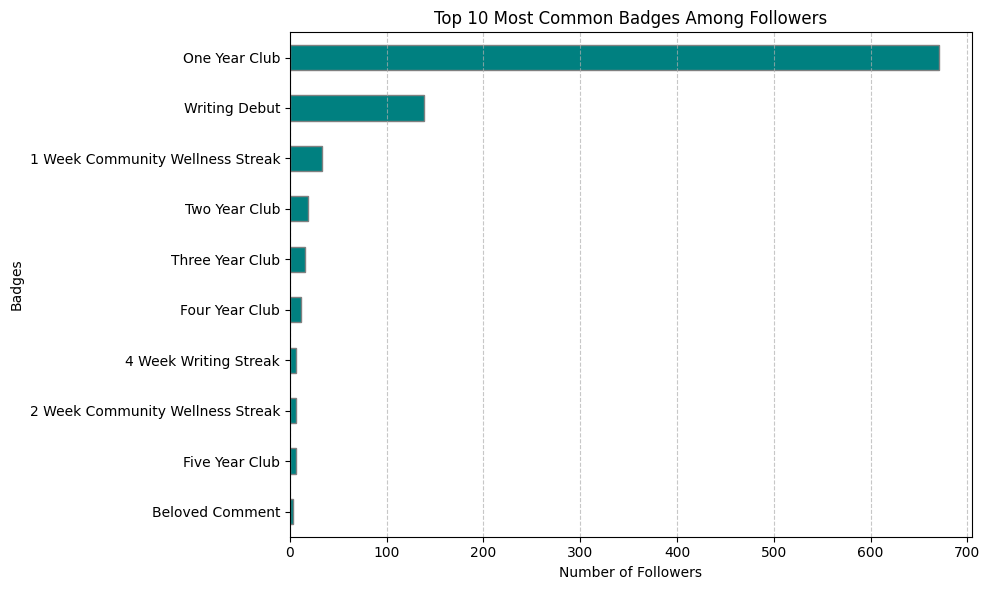

In [52]:
import matplotlib.pyplot as plt

# Explode the badges column in the full followers DataFrame and get the top 10 badges
top_badge_counts = extended_scrapped_followers_df['badges'].explode().value_counts().head(10)

# Plot the distribution of the top 10 badges
plt.figure(figsize=(10, 6))
top_badge_counts.plot(kind='barh', color='teal', edgecolor='gray')
plt.xlabel("Number of Followers")
plt.ylabel("Badges")
plt.title("Top 10 Most Common Badges Among Followers")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


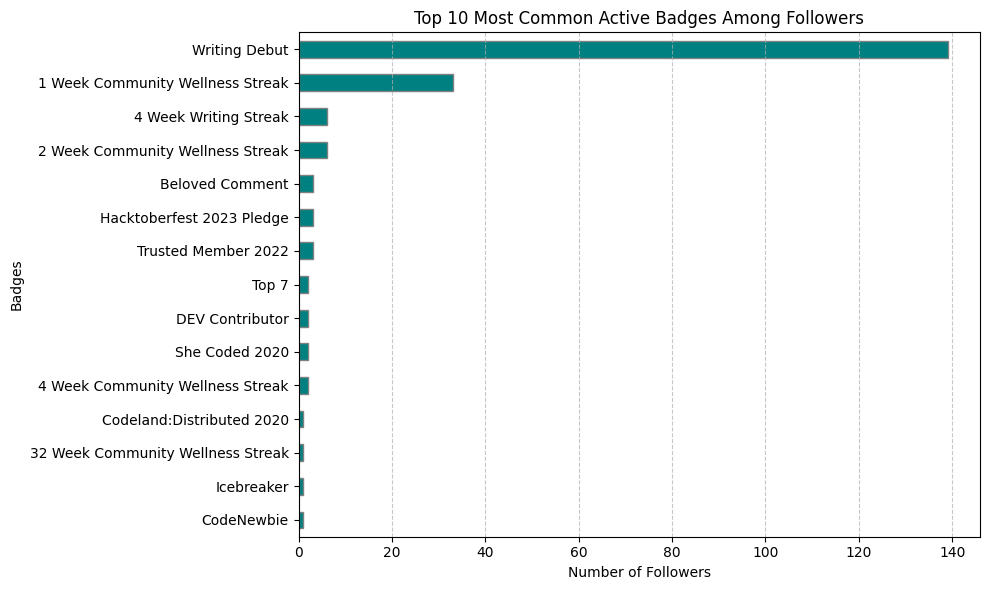

In [53]:
import matplotlib.pyplot as plt

# Explode the badges column in the full followers DataFrame
all_badge_counts = extended_scrapped_followers_df['badges'].explode().value_counts()

# Remove badges that contain "Year Club"
filtered_badge_counts = all_badge_counts[~all_badge_counts.index.str.contains("Year Club")].head(15)

# Plot the distribution of the top 10 active badges after filtering
plt.figure(figsize=(10, 6))
filtered_badge_counts.plot(kind='barh', color='teal', edgecolor='gray')
plt.xlabel("Number of Followers")
plt.ylabel("Badges")
plt.title("Top 10 Most Common Active Badges Among Followers")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


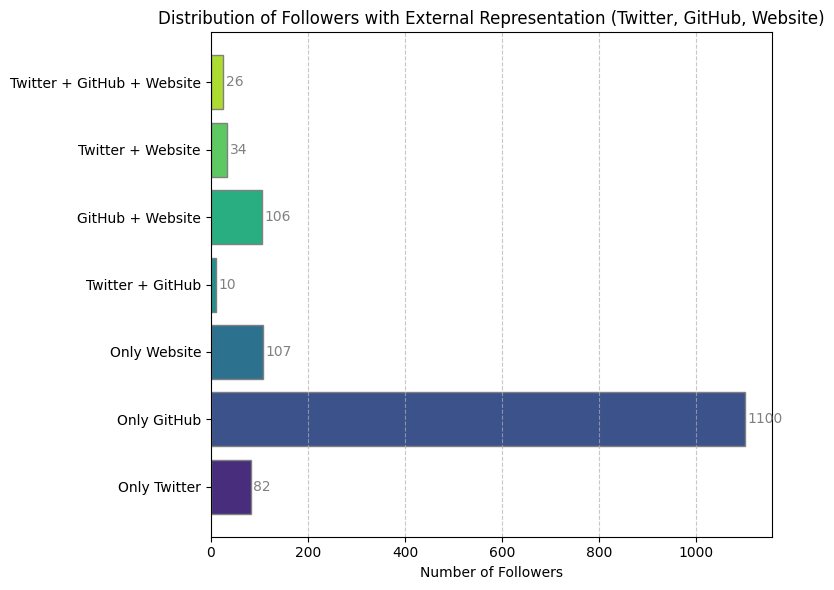

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Define conditions for each group
external_representation_counts = {
    "Only Twitter": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].notna()) &
        (extended_scrapped_followers_df['github_username'].isnull()) &
        (extended_scrapped_followers_df['website_url'].isnull())
    ].shape[0],
    
    "Only GitHub": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].isnull()) &
        (extended_scrapped_followers_df['github_username'].notna()) &
        (extended_scrapped_followers_df['website_url'].isnull())
    ].shape[0],
    
    "Only Website": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].isnull()) &
        (extended_scrapped_followers_df['github_username'].isnull()) &
        (extended_scrapped_followers_df['website_url'].notna())
    ].shape[0],
    
    "Twitter + GitHub": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].notna()) &
        (extended_scrapped_followers_df['github_username'].notna()) &
        (extended_scrapped_followers_df['website_url'].isnull())
    ].shape[0],
    
    "GitHub + Website": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].isnull()) &
        (extended_scrapped_followers_df['github_username'].notna()) &
        (extended_scrapped_followers_df['website_url'].notna())
    ].shape[0],
    
    "Twitter + Website": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].notna()) &
        (extended_scrapped_followers_df['github_username'].isnull()) &
        (extended_scrapped_followers_df['website_url'].notna())
    ].shape[0],
    
    "Twitter + GitHub + Website": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].notna()) &
        (extended_scrapped_followers_df['github_username'].notna()) &
        (extended_scrapped_followers_df['website_url'].notna())
    ].shape[0]
}

# Prepare data for plotting
labels = list(external_representation_counts.keys())
values = list(external_representation_counts.values())

# Choose a color palette from Seaborn
palette = sns.color_palette("viridis", len(labels))

# Plot
plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

# Add titles and labels
plt.xlabel("Number of Followers")
plt.title("Distribution of Followers with External Representation (Twitter, GitHub, Website)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


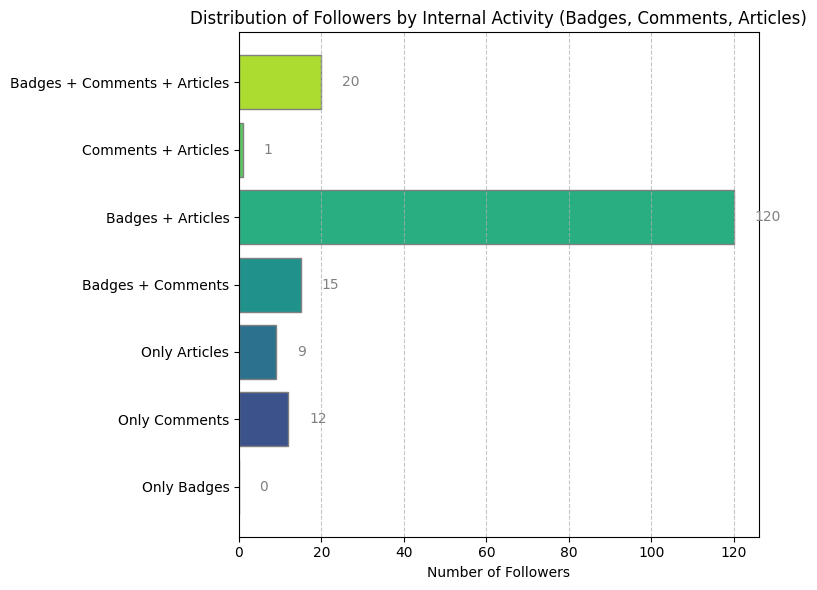

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Make a copy of the DataFrame to work with
filtered_followers_df = extended_scrapped_followers_df.copy()

# Function to filter out 'Year Club' items
def remove_year_club(budges_list):
    return [badge for badge in budges_list if not badge.endswith("Year Club")]

# Apply the function to the 'budges' column
filtered_followers_df['badges'] = filtered_followers_df['badges'].apply(remove_year_club)

# Define conditions for each group with filtered badges
internal_activity_counts = {
    "Only Badges": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] == 0) &
        (filtered_followers_df['tags_count'] == 0) &
        (filtered_followers_df[['twitter_username', 'github_username', 'location', 
                                'website_url', 'summary']].isnull().all(axis=1))
    ].shape[0],
    
    "Only Comments": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] == 0)
    ].shape[0],
    
    "Only Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Badges + Comments": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] == 0)
    ].shape[0],
    
    "Badges + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Comments + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Badges + Comments + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0]
}

# Prepare data for plotting
labels = list(internal_activity_counts.keys())
values = list(internal_activity_counts.values())

# Choose a color palette from Seaborn
palette = sns.color_palette("viridis", len(labels))

# Plot
plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

# Add titles and labels
plt.xlabel("Number of Followers")
plt.title("Distribution of Followers by Internal Activity (Badges, Comments, Articles)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


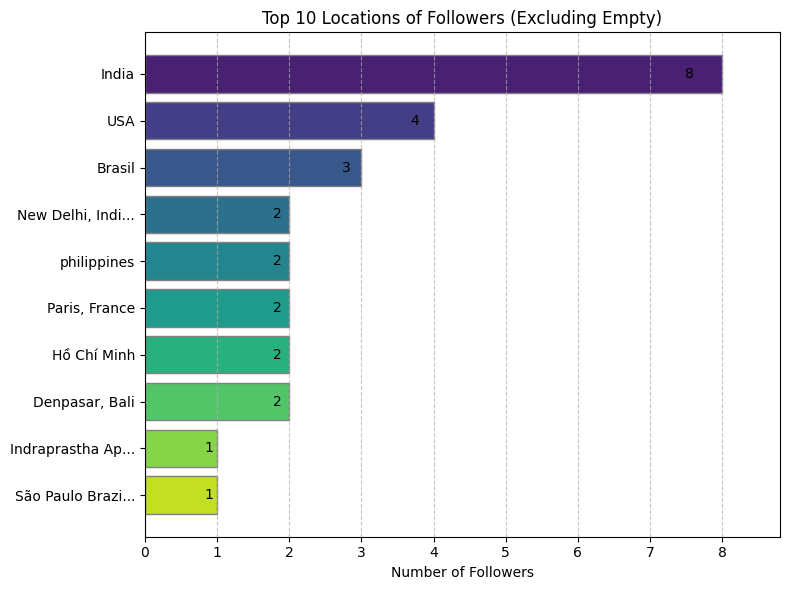

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a copy of the followers DataFrame to avoid modifying the original
followers_df_copy = extended_scrapped_followers_df.copy()

# Filter out empty or NaN values in the 'location' column and calculate the top 10 locations
top_locations = followers_df_copy['location'].dropna().replace('', pd.NA).dropna().value_counts().nlargest(10)

# Truncate location names to a maximum of 15 characters
def truncate_label(label, max_length=15):
    return label if len(label) <= max_length else label[:max_length] + "..."

# Apply truncation to labels
labels = [truncate_label(loc) for loc in top_locations.index]
values = top_locations.values

# Choose a color palette from Seaborn
palette = sns.color_palette("viridis", len(labels))

# Plot
plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

# Set x-axis limit slightly above the max value to reduce whitespace
plt.xlim(0, max(values) * 1.1)

# Add value labels closer to the end of each bar
for bar in bars:
    plt.text(bar.get_width() - (bar.get_width() * 0.05),  # Position slightly left of the end
             bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}',
             va='center', ha='right', fontsize=10, color='black')

# Add titles and labels
plt.xlabel("Number of Followers")
plt.title("Top 10 Locations of Followers (Excluding Empty)")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest location at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()





In [57]:
import pandas as pd

# Create a copy of the followers DataFrame
filtered_followers_df = followers_df_copy.copy()

# Function to filter lists based on the reading time condition
def filter_articles(row):
    # Unpack the row data
    titles = row['article_titles']
    reading_times = row['article_reading_time_minutes']
    comments = row['article_comments_counts']
    reactions = row['article_positive_reactions_counts']
    
    # Apply the filter based on reading time > 1
    filtered_data = [
        (title, time, comment, reaction) 
        for title, time, comment, reaction in zip(titles, reading_times, comments, reactions) 
        if time > 1
    ]
    
    # Unpack filtered data back into individual lists
    if filtered_data:
        titles, reading_times, comments, reactions = zip(*filtered_data)
    else:
        # If no articles pass the filter, assign empty lists
        titles, reading_times, comments, reactions = [], [], [], []
    
    # Return the filtered data as a dictionary
    return pd.Series({
        'article_titles': list(titles),
        'article_reading_time_minutes': list(reading_times),
        'article_comments_counts': list(comments),
        'article_positive_reactions_counts': list(reactions)
    })

# Apply the filtering function to each row in the DataFrame
filtered_columns = filtered_followers_df.apply(filter_articles, axis=1)

# Update the filtered DataFrame with the new filtered columns
filtered_followers_df[['article_titles', 'article_reading_time_minutes', 
                       'article_comments_counts', 'article_positive_reactions_counts']] = filtered_columns

# Recalculate 'article_count' based on the new 'article_titles' list length
filtered_followers_df['article_count'] = filtered_followers_df['article_titles'].apply(len)

# Now `filtered_followers_df` contains only articles with reading time > 1 minute


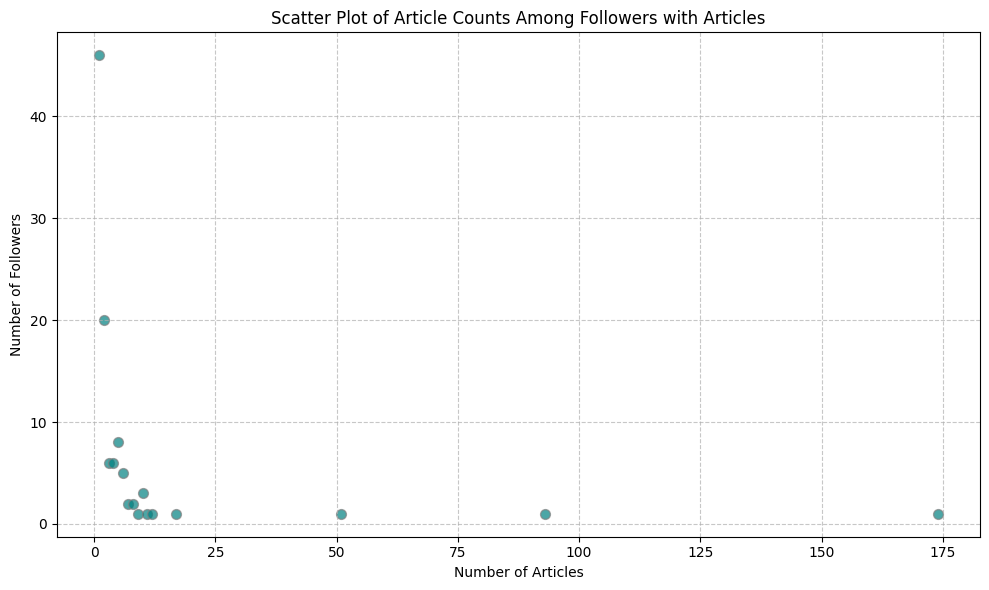

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame for followers with at least one article
followers_with_articles = filtered_followers_df[filtered_followers_df['article_count'] > 0]

# Group by 'article_count' and get the number of followers for each count
article_distribution = followers_with_articles['article_count'].value_counts().sort_index()

# Prepare data for plotting
x = article_distribution.index  # Number of articles
y = article_distribution.values  # Number of followers with that article count

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="teal", edgecolor="gray", s=50, alpha=0.7)

# Add titles and labels
plt.xlabel("Number of Articles")
plt.ylabel("Number of Followers")
plt.title("Scatter Plot of Article Counts Among Followers with Articles")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


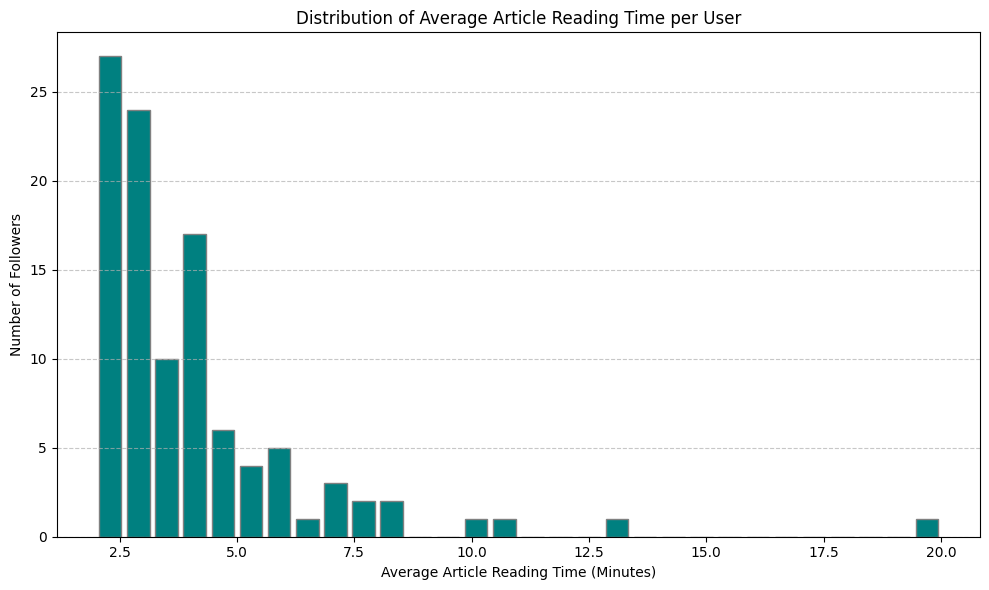

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame for followers with at least one article
followers_with_articles = filtered_followers_df[filtered_followers_df['article_count'] > 0].copy()

# Calculate the average reading time per user
followers_with_articles['average_reading_time'] = followers_with_articles['article_reading_time_minutes'].apply(
    lambda x: sum(x) / len(x) if len(x) > 0 else 0
)

# Extract the average reading times
average_reading_times = followers_with_articles['average_reading_time']

# Plot the distribution as a histogram
plt.figure(figsize=(10, 6))
plt.hist(average_reading_times, bins=30, color="teal", edgecolor="gray", rwidth=0.8)

# Add titles and labels
plt.xlabel("Average Article Reading Time (Minutes)")
plt.ylabel("Number of Followers")
plt.title("Distribution of Average Article Reading Time per User")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


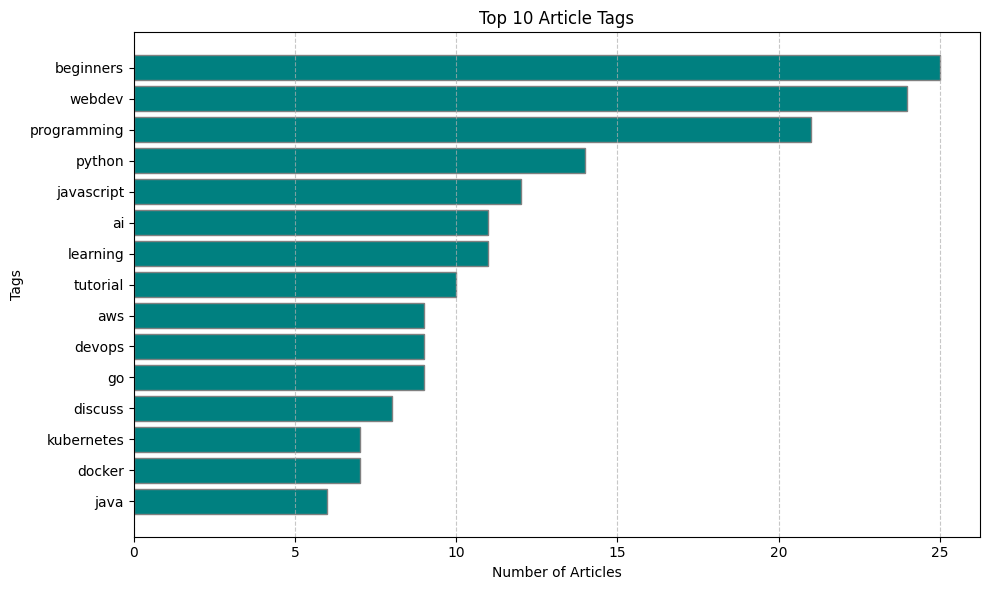

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Flatten the list of tags and count occurrences
all_tags = [tag for tags_list in filtered_followers_df['unique_tags'] for tag in tags_list if pd.notnull(tag)]
tag_counts = Counter(all_tags)

# Get the top 10 tags
top_tags = tag_counts.most_common(15)
tags, counts = zip(*top_tags)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(tags, counts, color="teal", edgecolor="gray")

# Add labels and title
plt.xlabel("Number of Articles")
plt.ylabel("Tags")
plt.title("Top 10 Article Tags")
plt.gca().invert_yaxis()  # Highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


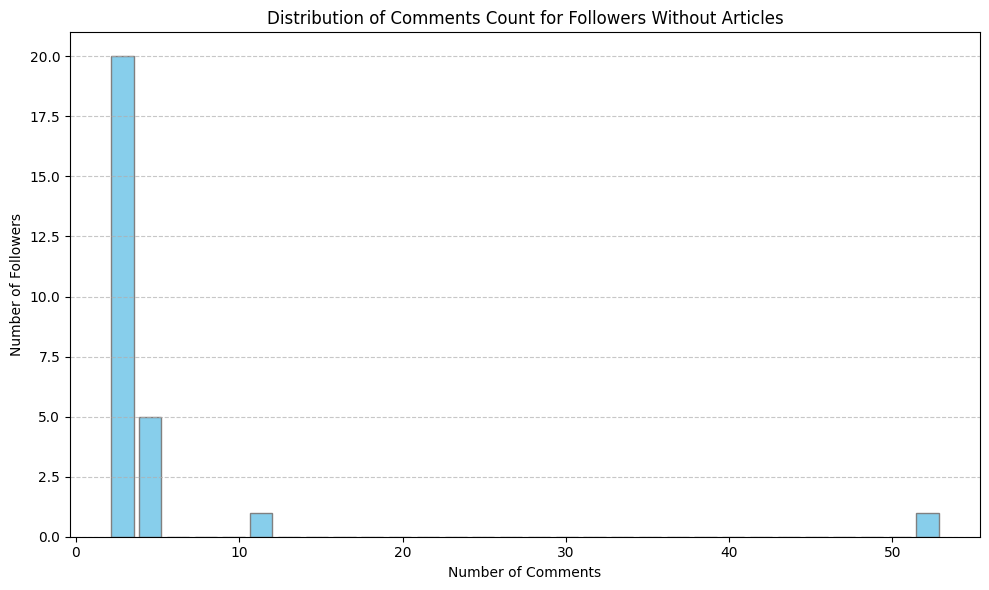

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame to include only followers with comments but no articles
followers_with_only_comments = followers_df_copy[(followers_df_copy['comments_count'] > 0) & (followers_df_copy['article_count'] == 0)]

# Plot the distribution of comments_count
plt.figure(figsize=(10, 6))
plt.hist(followers_with_only_comments['comments_count'], bins=30, color="skyblue", edgecolor="gray", rwidth=0.8)

# Add titles and labels
plt.xlabel("Number of Comments")
plt.ylabel("Number of Followers")
plt.title("Distribution of Comments Count for Followers Without Articles")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


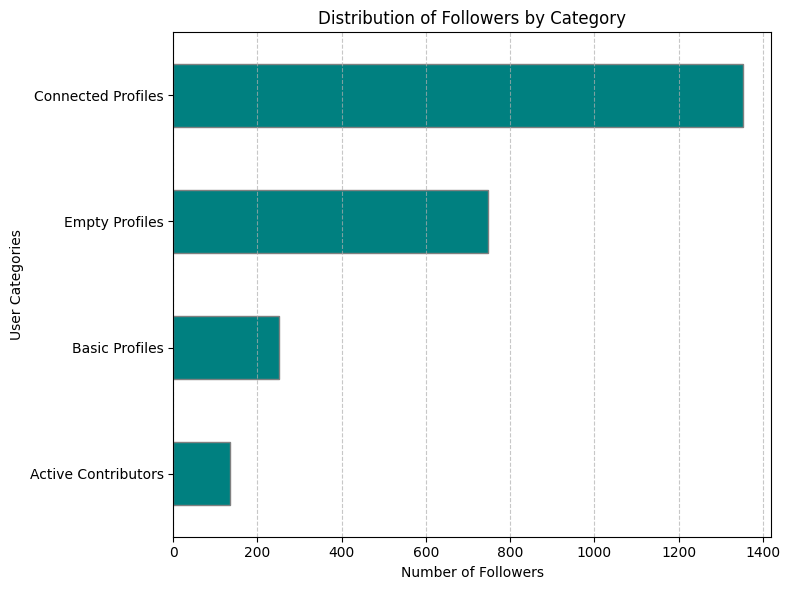

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a copy of the followers DataFrame and filter articles by reading time
filtered_followers_df = followers_df_copy.copy()

# Function to filter lists based on the reading time condition
def filter_articles(row):
    titles = row['article_titles']
    reading_times = row['article_reading_time_minutes']
    comments = row['article_comments_counts']
    reactions = row['article_positive_reactions_counts']
    
    # Apply the filter based on reading time > 1
    filtered_data = [
        (title, time, comment, reaction) 
        for title, time, comment, reaction in zip(titles, reading_times, comments, reactions) 
        if time > 1
    ]
    
    if filtered_data:
        titles, reading_times, comments, reactions = zip(*filtered_data)
    else:
        titles, reading_times, comments, reactions = [], [], [], []
    
    return pd.Series({
        'article_titles': list(titles),
        'article_reading_time_minutes': list(reading_times),
        'article_comments_counts': list(comments),
        'article_positive_reactions_counts': list(reactions)
    })

# Apply the filtering function to each row in the DataFrame
filtered_columns = filtered_followers_df.apply(filter_articles, axis=1)
filtered_followers_df[['article_titles', 'article_reading_time_minutes', 
                       'article_comments_counts', 'article_positive_reactions_counts']] = filtered_columns

# Recalculate 'article_count' based on the new 'article_titles' list length
filtered_followers_df['article_count'] = filtered_followers_df['article_titles'].apply(len)

# Step 2: Define Categories
filtered_followers_df['category'] = 'Empty Profiles'  # Default category

# Active Contributors: Users with articles (with reading time > 1) or comments
filtered_followers_df.loc[(filtered_followers_df['article_count'] > 0) | 
                          (filtered_followers_df['comments_count'] > 0), 'category'] = 'Active Contributors'

# Connected Profiles: Users with external connections (website, GitHub, or Twitter)
filtered_followers_df.loc[(filtered_followers_df[['website_url', 'github_username', 'twitter_username']].notna().any(axis=1)) &
                          (filtered_followers_df['category'] == 'Empty Profiles'), 'category'] = 'Connected Profiles'

# Basic Profiles: Users with minimal signs (location or summary)
filtered_followers_df.loc[(filtered_followers_df[['location', 'summary']].notna().any(axis=1)) &
                          (filtered_followers_df['category'] == 'Empty Profiles'), 'category'] = 'Basic Profiles'

# Step 3: Count Users in Each Category
category_counts = filtered_followers_df['category'].value_counts()

# Step 4: Plot the Results
plt.figure(figsize=(8, 6))
category_counts.plot(kind='barh', color="teal", edgecolor="gray")
plt.xlabel("Number of Followers")
plt.ylabel("User Categories")
plt.title("Distribution of Followers by Category")
plt.gca().invert_yaxis()  # Highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


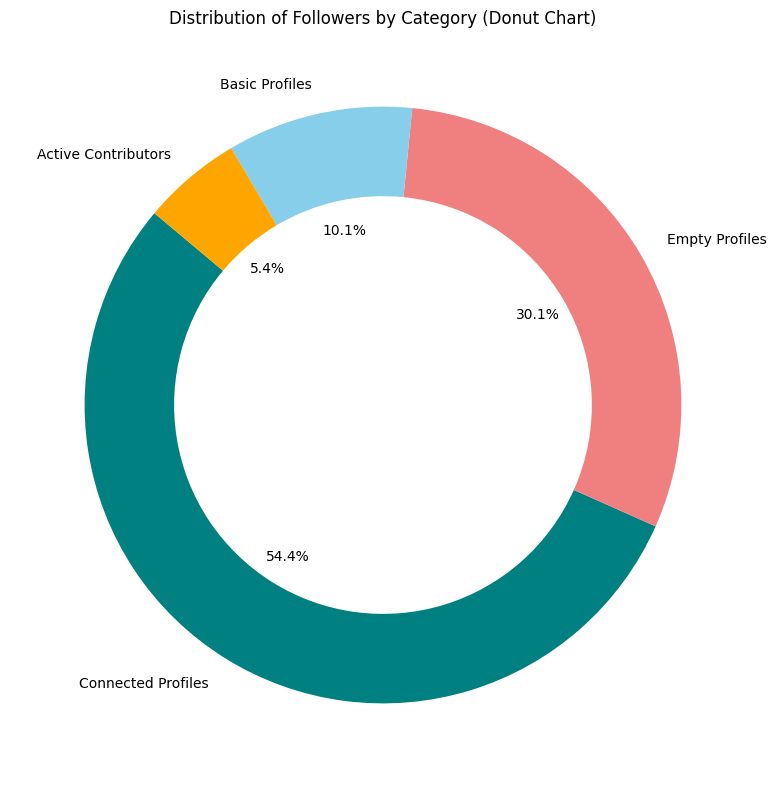

In [63]:
import matplotlib.pyplot as plt

# Step 1: Count users in each category (if not done already)
category_counts = filtered_followers_df['category'].value_counts()

# Step 2: Create the Donut Chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3}, colors=["teal", "lightcoral", "skyblue", "orange"])

# Add title
plt.title("Distribution of Followers by Category (Donut Chart)")
plt.tight_layout()

plt.show()


/var/folders/66/fl7_dzv10kddsf6t0v_7rb1c0000gn/T/ipykernel_49922/3302673549.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



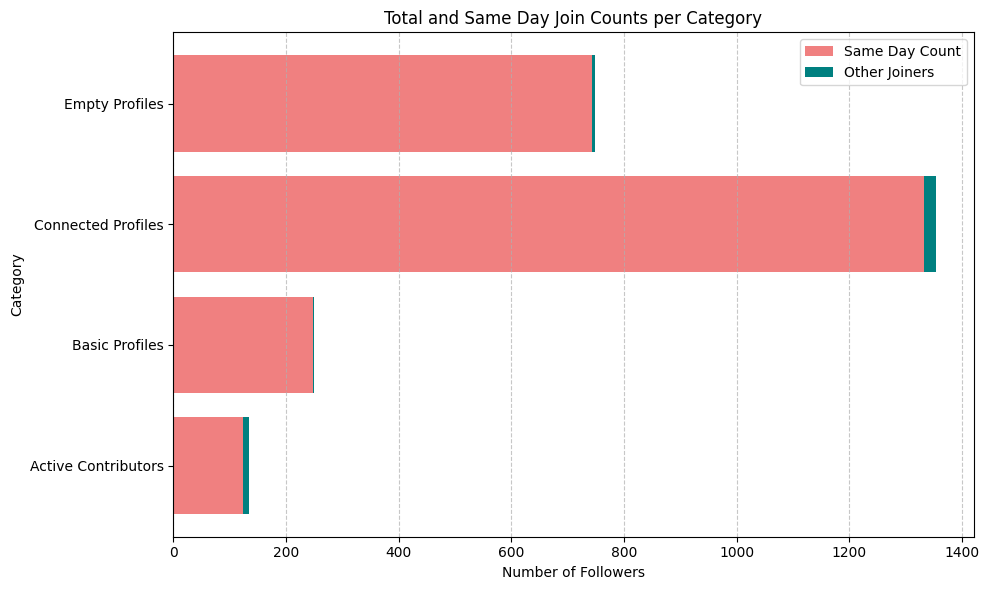

In [64]:
import matplotlib.pyplot as plt
import numpy as np

filtered_followers_df['joined_at'] = pd.to_datetime(filtered_followers_df['joined_at']).dt.date
filtered_followers_df['created_at'] = pd.to_datetime(filtered_followers_df['created_at']).dt.date

# Create the DataFrame as previously
category_summary = filtered_followers_df.groupby('category').apply(
    lambda x: pd.Series({
        'total_count': x['created_at'].count(),
        'same_day_count': (x['created_at'] == x['joined_at']).sum()
    })
).reset_index()

# Calculate the 'other' count (total_count - same_day_count) for each category
category_summary['other_count'] = category_summary['total_count'] - category_summary['same_day_count']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot same_day_count as the base of each bar
ax.barh(category_summary['category'], category_summary['same_day_count'], color="lightcoral", label="Same Day Count")

# Plot the remaining part of the total count (other_count) on top of same_day_count
ax.barh(category_summary['category'], category_summary['other_count'], left=category_summary['same_day_count'], color="teal", label="Other Joiners")

# Add labels and title
ax.set_xlabel("Number of Followers")
ax.set_ylabel("Category")
ax.set_title("Total and Same Day Join Counts per Category")
ax.legend()

# Display the plot
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


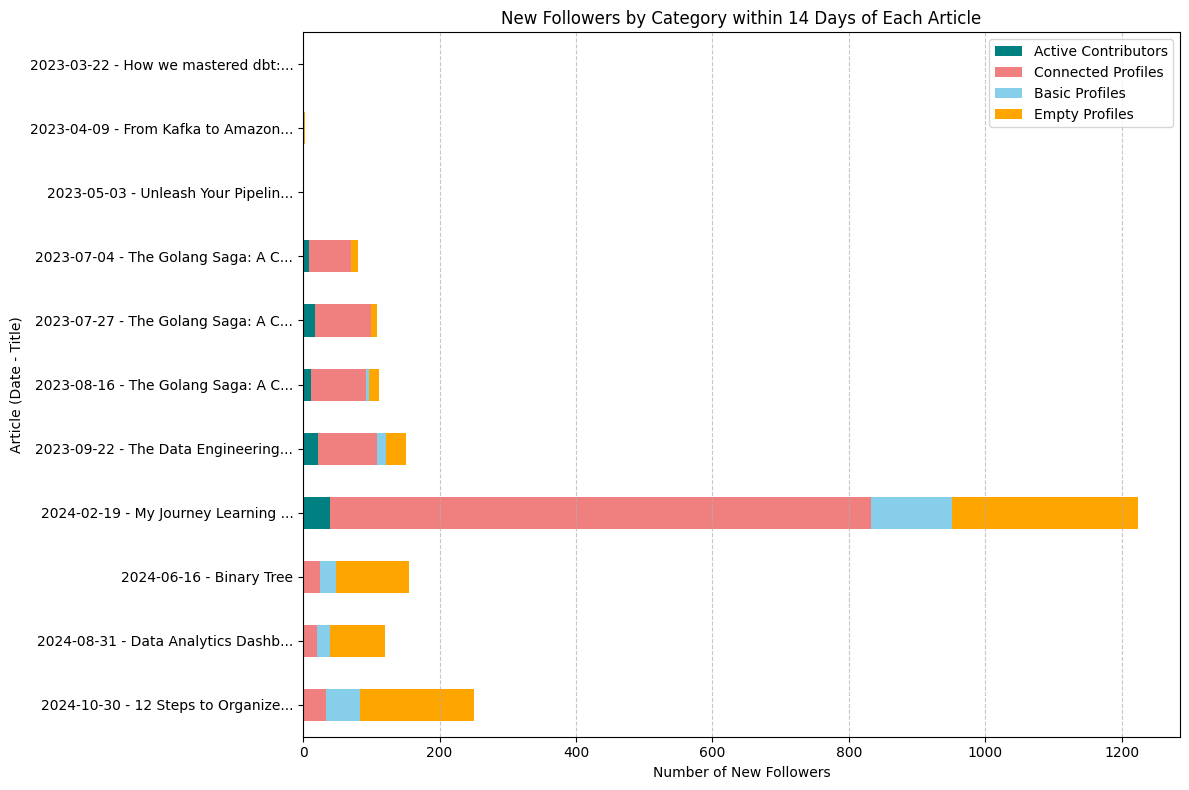

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure joined_at and created_at are date-only
filtered_followers_df['joined_at'] = pd.to_datetime(filtered_followers_df['joined_at']).dt.date
articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at']).dt.date

# Set the duration window in days
duration = 14

# Create a list to hold category counts per article
category_counts_per_article = []

# Shorten titles function
def shorten_title(title, max_length=20):
    return title if len(title) <= max_length else title[:max_length] + "..."


# Iterate over each article's publication date and title
for article_date, article_title in zip(articles_df_copy['created_at'], articles_df_copy['title']):
    # Define the end date for the 14-day window
    end_date = article_date + pd.Timedelta(days=duration)
    
    # Filter followers who joined within this 14-day window
    new_followers = filtered_followers_df[
        (filtered_followers_df['joined_at'] >= article_date) & 
        (filtered_followers_df['joined_at'] <= end_date)
    ]
    
    # Count the number of followers in each category within this period
    category_counts = new_followers['category'].value_counts()
    
    # Append the article date, title, and category counts to the list
    category_counts_per_article.append({
        'article_label': f"{article_date} - {shorten_title(article_title)}",
        'Active Contributors': category_counts.get('Active Contributors', 0),
        'Connected Profiles': category_counts.get('Connected Profiles', 0),
        'Basic Profiles': category_counts.get('Basic Profiles', 0),
        'Empty Profiles': category_counts.get('Empty Profiles', 0)
    })

# Convert the list into a DataFrame for easier plotting
category_counts_df = pd.DataFrame(category_counts_per_article)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each category as a separate bar stack for each article
category_counts_df.set_index('article_label').plot(kind='barh', stacked=True, ax=ax,
    color=['teal', 'lightcoral', 'skyblue', 'orange'])

# Add labels and title
ax.set_xlabel("Number of New Followers")
ax.set_ylabel("Article (Date - Title)")
ax.set_title("New Followers by Category within 14 Days of Each Article")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
